Ya hemos limpiado todas las columnas que parecía que no tenían el tipo de dato que queríamos o que tenían demasiada información. Por lo tanto, en este ejercicio tendremos que limpiar los outliers.

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

In [5]:
df = pd.read_csv('../FILES/attacks_limpio_2.csv', index_col = 0)

1- ¿Sobre qué columnas podremos eliminar o reemplazar los outliers?

In [6]:
df.head(3)

,case_number,year,type,country,activity,age,species_,month,fatal,gender
0,2018.06.25,2018,Boating,usa,Paddling,57.0,White,Jun,n,F
1,2018.06.18,2018,Unprovoked,usa,Standing,11.0,Unknown,Jun,n,F
2,2018.06.09,2018,Invalid,usa,Surfing,48.0,Unknown,Jun,n,M


In [10]:
df.dtypes

case_number     object
year             int64
type            object
country         object
activity        object
age            float64
species_        object
month           object
fatal           object
gender          object
dtype: object

In [11]:
# creamos un dataframe las variables numéricas
df_numericas = df.select_dtypes(include=np.number)
df_numericas.head()

,year,age
0,2018,57.0
1,2018,11.0
2,2018,48.0
3,2018,NaN
4,2018,NaN


In [12]:
df_numericas.columns

Index(['year', 'age'], dtype='object')

Procedemos  a sacar los outliers
Primero sacamos Q1 y q3 y despues sacamos el rango intercuatilico.


In [13]:
Q1 = np.nanpercentile(df['year'], 25)

In [14]:
Q3 = np.nanpercentile(df['year'], 75)

In [15]:
IQR = Q3 - Q1
IQR

63.0

In [17]:
outlier_step = 1.5 * IQR

In [18]:
outliers_data = df[(df["year"] < Q1 - outlier_step) | (df["year"] > Q3 + outlier_step)]
outliers_data

,case_number,year,type,country,activity,age,species_,month,fatal,gender
6022,1847.11.30,1847,Unprovoked,australia,Swimming,NaN,Unknown,Nov,n,M
6023,1847.09.10,1847,Unprovoked,usa,Wading,NaN,Unknown,Sep,n,M
6024,1847.07.19,1847,Unprovoked,greece,Swimming,19.0,Unknown,Jul,y,M
6025,1847.07.03.R,1847,Unprovoked,usa,Hilo,NaN,Unknown,Jul,n,M
6026,1847.03.11,1847,Sea Disaster,australia,Wreck of the Sovereign,NaN,Unknown,Mar,n,M
...,...,...,...,...,...,...,...,...,...,...
6279,ND.0005,0,Unprovoked,australia,Diving,NaN,Unknown,NaN,y,M
6280,ND.0004,0,Unprovoked,australia,Pearl diving,NaN,Unknown,NaN,y,M
6281,ND.0003,0,Unprovoked,usa,Swimming,NaN,Unknown,NaN,y,M
6282,ND.0002,0,Unprovoked,panama,NaN,NaN,Unknown,NaN,y,M


In [19]:
x = list(outliers_data.index)
x

[6022,
 6023,
 6024,
 6025,
 6026,
 6027,
 6028,
 6029,
 6030,
 6031,
 6032,
 6033,
 6034,
 6035,
 6036,
 6037,
 6038,
 6039,
 6040,
 6041,
 6042,
 6043,
 6044,
 6045,
 6046,
 6046,
 6047,
 6048,
 6049,
 6050,
 6051,
 6052,
 6053,
 6054,
 6055,
 6056,
 6057,
 6058,
 6059,
 6060,
 6061,
 6062,
 6063,
 6064,
 6065,
 6066,
 6067,
 6068,
 6069,
 6070,
 6071,
 6072,
 6073,
 6074,
 6075,
 6076,
 6077,
 6078,
 6079,
 6080,
 6081,
 6082,
 6083,
 6084,
 6085,
 6086,
 6087,
 6088,
 6089,
 6090,
 6091,
 6092,
 6093,
 6094,
 6095,
 6096,
 6097,
 6098,
 6099,
 6100,
 6101,
 6102,
 6103,
 6104,
 6105,
 6106,
 6108,
 6109,
 6110,
 6111,
 6112,
 6113,
 6114,
 6115,
 6116,
 6117,
 6118,
 6119,
 6120,
 6121,
 6122,
 6123,
 6124,
 6125,
 6126,
 6127,
 6128,
 6129,
 6130,
 6131,
 6132,
 6133,
 6134,
 6135,
 6136,
 6137,
 6138,
 6139,
 6140,
 6141,
 6142,
 6143,
 6144,
 6145,
 6146,
 6147,
 6148,
 6149,
 6150,
 6151,
 6152,
 6153,
 6154,
 6155,
 6156,
 6157,
 6158,
 6159,
 6160,
 6161,
 6162,
 6163,
 6164,

In [20]:
# detectamos los outliers, creando un diccionario dónde almacenamos el resultado y pasamos a lista
dicc_indices = {}
def detectar_outliers(lista_columnas, dataframe): 
    for file in lista_columnas:
        if outliers_data.shape[0] > 0: 
        
            dicc_indices[file] = (list(outliers_data.index))  
        return dicc_indices 

In [21]:

lista_columnas = list(df_numericas.columns)
lista_columnas

['year', 'age']

In [23]:
ind = detectar_outliers(lista_columnas, df)
print(ind)

{'year': [6022, 6023, 6024, 6025, 6026, 6027, 6028, 6029, 6030, 6031, 6032, 6033, 6034, 6035, 6036, 6037, 6038, 6039, 6040, 6041, 6042, 6043, 6044, 6045, 6046, 6046, 6047, 6048, 6049, 6050, 6051, 6052, 6053, 6054, 6055, 6056, 6057, 6058, 6059, 6060, 6061, 6062, 6063, 6064, 6065, 6066, 6067, 6068, 6069, 6070, 6071, 6072, 6073, 6074, 6075, 6076, 6077, 6078, 6079, 6080, 6081, 6082, 6083, 6084, 6085, 6086, 6087, 6088, 6089, 6090, 6091, 6092, 6093, 6094, 6095, 6096, 6097, 6098, 6099, 6100, 6101, 6102, 6103, 6104, 6105, 6106, 6108, 6109, 6110, 6111, 6112, 6113, 6114, 6115, 6116, 6117, 6118, 6119, 6120, 6121, 6122, 6123, 6124, 6125, 6126, 6127, 6128, 6129, 6130, 6131, 6132, 6133, 6134, 6135, 6136, 6137, 6138, 6139, 6140, 6141, 6142, 6143, 6144, 6145, 6146, 6147, 6148, 6149, 6150, 6151, 6152, 6153, 6154, 6155, 6156, 6157, 6158, 6159, 6160, 6161, 6162, 6163, 6164, 6165, 6166, 6167, 6168, 6169, 6170, 6171, 6172, 6173, 6174, 6175, 6176, 6177, 6178, 6179, 6180, 6181, 6182, 6183, 6184, 6185, 6186, 

In [24]:
df.describe()

,year,age
count,6328.000000,3478.000000
mean,1927.133059,27.284646
std,281.554598,13.876963
min,0.000000,1.000000
25%,1942.000000,17.000000
50%,1976.000000,24.000000
75%,2005.000000,35.000000
max,2018.000000,87.000000


In [25]:
for k, v in ind.items():
    median = df[k].median() 
    for i in v: 
        df.loc[i,k] = median

In [26]:
df

,case_number,year,type,country,activity,age,species_,month,fatal,gender
0,2018.06.25,2018,Boating,usa,Paddling,57.0,White,Jun,n,F
1,2018.06.18,2018,Unprovoked,usa,Standing,11.0,Unknown,Jun,n,F
2,2018.06.09,2018,Invalid,usa,Surfing,48.0,Unknown,Jun,n,M
3,2018.06.08,2018,Unprovoked,australia,Surfing,NaN,Unknown,Jun,n,M
4,2018.06.04,2018,Provoked,mexico,Free diving,NaN,Tiger,Jun,n,M
...,...,...,...,...,...,...,...,...,...,...
6279,ND.0005,1976,Unprovoked,australia,Diving,NaN,Unknown,NaN,y,M
6280,ND.0004,1976,Unprovoked,australia,Pearl diving,NaN,Unknown,NaN,y,M
6281,ND.0003,1976,Unprovoked,usa,Swimming,NaN,Unknown,NaN,y,M
6282,ND.0002,1976,Unprovoked,panama,NaN,NaN,Unknown,NaN,y,M


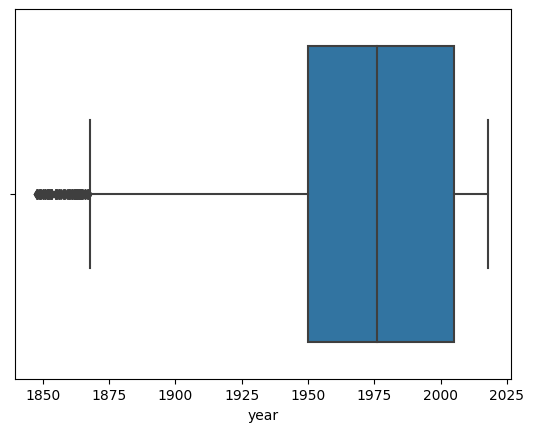

In [27]:
figure =  figsize=(40,65)
sns.boxplot(x='year', data=df);

5- Guarda el csv con las columnas limpias para seguir trabajando con este dataframe limpio en el siguiente pair programming de limpieza

In [28]:
df.to_csv("../FILES/attacks_limpio_3.csv")